<a href="https://colab.research.google.com/github/shailza969/MNIST-data-/blob/main/MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shailzabansal","key":"73bb5550ea87469ce9208aed0b12b286"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-09 12:09:58           7248  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4385  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1480  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            488  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
! kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:00<00:00, 91.7MB/s]
100% 15.2M/15.2M [00:00<00:00, 97.6MB/s]


In [ ]:
! unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv("/content/mnist_train.csv")

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

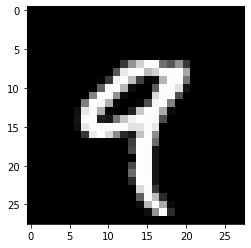

In [ ]:
def image_plot(x):
  x = x.reshape(28, 28)
  plt.imshow(x, cmap = "gray")

test = df.values
image_plot(test[4][1:])

In [ ]:
X_train= df.iloc[:, 1:].values
Y_train = df.iloc[:, 0].values
X_train.shape, Y_train.shape

((60000, 784), (60000,))

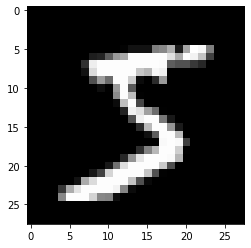

In [ ]:
image_plot(X_train[0])

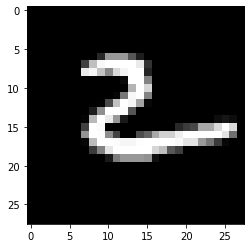

In [ ]:
image_plot(X_train[109])


In [ ]:
Y_train[109]

2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train , test_size = 0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

# Code for KNN algorithm

In [ ]:
def knn(X,Y, testing_point, k =7):
  vals=[]
  m = X.shape[0]
  for i in range(m):
    dist = np.sqrt(sum((X[i]- testing_point)**2))
    vals.append([dist, Y[i]])

  vals = sorted(vals)

  vals = vals[:k]
  vals = np.array(vals)
  new_val = np.unique(vals[:,1], return_counts=True)
  index = new_val[1].argmax()
  predicting = new_val[0][index]
  return predicting

# Training and Testing

In [ ]:
predl = []
for i in tqdm(range(20)):
  predl.append(knn(X_train, Y_train, X_test[i]))

100%|██████████| 20/20 [02:35<00:00,  7.80s/it]


# Inbuilt Code

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5,n_jobs= -1)
clf.fit(X_train,Y_train)
predict = clf.predict(X_test[:20])
predict

array([5, 6, 7, 6, 9, 3, 9, 3, 7, 7, 1, 1, 8, 8, 1, 9, 4, 2, 0, 5])

In [ ]:
predl

[5.0,
 6.0,
 7.0,
 6.0,
 9.0,
 3.0,
 9.0,
 3.0,
 7.0,
 7.0,
 1.0,
 1.0,
 8.0,
 8.0,
 1.0,
 9.0,
 4.0,
 2.0,
 0.0,
 5.0]

In [ ]:
(predl==predict).sum()

20

## Accuracy

In [ ]:
(Y_test[:20]==predict).sum()/20


0.95

## Testing unknown Data

In [ ]:
pred1 = clf.predict(X_test[:50])  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test[:50], pred1)


array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 6, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])